# Explore the feature ‘residual sugar’. Does it contain outliers? On which rows of the data frame are they found? Remove those rows.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df_red = pd.read_csv(r'..\data\red_wine_cleaned.csv')
df_white = pd.read_csv(r'..\data\red_wine_cleaned.csv')
df_all = pd.read_csv(r'..\data\red_white_wine_cleaned.csv')

In [3]:
df_all.describe()

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,2658.500000,7.214921,0.344146,0.318358,5.047255,0.056692,30.033847,114.010906,0.994536,3.224744,0.533366,10.548583,5.795224
std,1535.318697,1.319852,0.168278,0.147018,4.500584,0.036870,17.807805,56.670131,0.002966,0.160355,0.149770,1.185670,0.879627
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1329.250000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.112500,0.430000,9.500000,5.000000
50%,2658.500000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,3987.750000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,5317.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


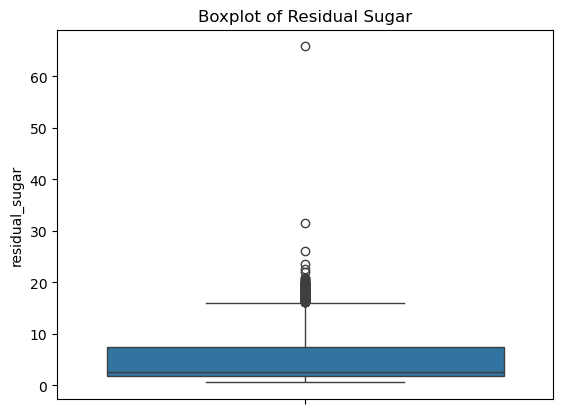

In [5]:
# Check for outliers using a boxplot

sns.boxplot(data=df_all['residual_sugar'])
plt.title("Boxplot of Residual Sugar")
plt.show()

In [7]:
# Calculate IQR
Q1 = df_all['residual_sugar'].quantile(0.25)
Q3 = df_all['residual_sugar'].quantile(0.75)
IQR = Q3 - Q1

In [8]:
# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
# Find rows with outliers
outlier_rows = df_all[(df_all['residual_sugar'] < lower_bound) | (df_all['residual_sugar'] > upper_bound)]
print("Outliers found at rows:", outlier_rows.index.tolist())
print("Total number of outlier rows: ", len(outlier_rows))

Outliers found at rows: [1357, 1367, 1390, 1445, 1447, 1450, 1504, 1512, 1528, 1543, 1548, 1569, 1577, 1603, 1693, 1696, 1701, 1726, 1746, 1775, 1836, 1864, 1874, 1883, 1940, 1961, 1999, 2000, 2009, 2040, 2152, 2169, 2196, 2237, 2269, 2273, 2279, 2338, 2408, 2458, 2486, 2572, 2586, 2610, 2612, 2644, 2677, 2713, 2735, 2751, 2776, 2779, 2798, 2813, 2858, 2873, 2912, 2940, 2945, 2948, 2994, 3001, 3013, 3020, 3030, 3040, 3071, 3117, 3132, 3159, 3163, 3223, 3237, 3290, 3331, 3348, 3363, 3370, 3381, 3427, 3433, 3464, 3474, 3497, 3524, 3587, 3590, 3607, 3651, 3654, 3688, 3829, 3834, 3852, 3856, 3914, 3928, 3939, 4030, 4157, 4171, 4176, 4217, 4257, 4258, 4261, 4287, 4312, 4319, 4335, 4359, 4374, 4397, 4432, 4468, 4476, 4499, 4503, 4542, 4555, 4598, 4602, 4613, 4622, 4669, 4678, 4682, 4810, 4811, 4893, 4910, 4926, 4936, 4937, 4957, 4970, 4975, 5141, 5187, 5188, 5211]
Total number of outlier rows:  141


* Total number of outlier rows:  141

In [17]:
# Remove outliers
df_all_cleaned = df_all[~df_all.index.isin(outlier_rows.index)]


In [19]:
# Check the number of rows before and after
print("Original number of rows:", len(df_all))
print("After removing outliers:", len(df_all_cleaned))

Original number of rows: 5318
After removing outliers: 5177


# Remove the attributes, which aren’t correlated with the wine quality, as well as the attributes that are highly correlated with another independent attribute.

In [21]:
#  Calculate the correlation matrix
correlation_matrix = df_all.corr(numeric_only=True)


In [22]:
# Correlation with 'quality'
quality_corr = correlation_matrix ['quality'].drop('quality')  # remove self-correlation

In [24]:
# Remove weakly correlated attributes with quality (e.g., abs(corr) < 0.05)
low_corr_features = quality_corr[quality_corr.abs() < 0.05].index.tolist()


In [25]:
print("Low correlation with quality:", low_corr_features)


Low correlation with quality: ['ph', 'sulphates']


* Low correlation with quality =  'ph' &  'sulphates'

In [27]:
# Find features highly correlated with each other (multicollinearity) - Create an upper triangle matrix of correlations
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))


In [30]:
# Drop features with correlation > 0.9
high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column].abs() > 0.8)]

In [33]:
print("Highly correlated features:", high_corr_features)

Highly correlated features: []


Highly correlated features higher than 0.9 = 0

# Transform the data by applying PCA (Principle Component Analysis).

In [42]:
# Separate features (X) and labels (y)
X = df_all.drop(columns='quality')  # Drop target
X = pd.get_dummies(X) # One-hot encode categorical features  
y = df_all['quality']

In [43]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

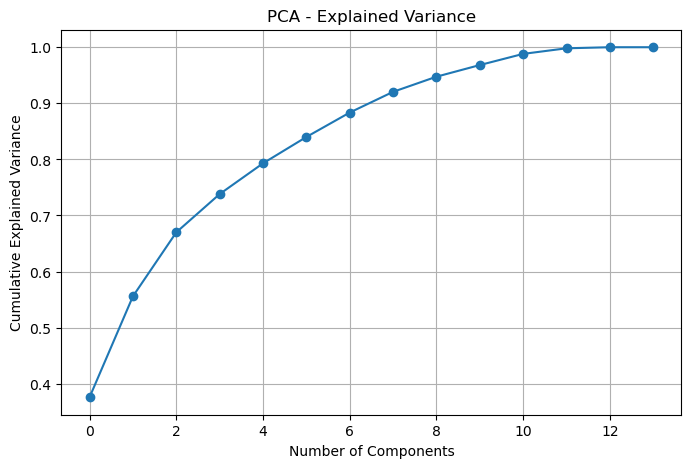

In [45]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

##### Principal Component Analysis (PCA)
1. Why use it?
* Your data may have too many columns (features).
* Some of them don’t matter or are very similar to others.
* PCA helps you keep just the useful information.

2. How it works:
* Looks at all your features.
* Finds new "summary features" (called principal components) that:
* Combine the old ones,
* Keep most of the important patterns,
* Throw away the noise or unhelpful stuff.



# Print out ten random rows from the final dataset as a prove of concept.

In [46]:
# Create a DataFrame from the reduced PCA data
df_pca = pd.DataFrame(X_pca)

In [48]:
print(df_pca.sample(10, random_state=42))  # random_state ensures repeatable results OBS 
# the number 42 has no special technical meaning.


            0         1         2         3         4         5         6   \
4697 -1.327750 -2.916807  1.147965 -0.598832  0.115964  0.172375 -0.712807   
5032 -1.484832 -1.566313  0.161356 -0.294954  0.307097  0.731071 -0.592348   
3750 -1.304487 -1.831635  0.503324  0.792287 -0.288803  0.271095 -0.019462   
1634 -0.625322  0.334451 -0.735059  0.401553  0.043217  0.126880  0.033215   
555   4.136821  0.907806  1.523042  3.057640 -0.511225  1.515802 -0.630438   
5292 -1.938595 -2.739737  0.277593  0.907315 -0.468784  0.139790 -1.085040   
530   3.007254  1.308779  0.798480  0.579182 -0.993480 -1.866384 -0.120561   
4141 -1.396922  1.175442 -1.520869  1.416043 -0.136242  0.223822 -0.300184   
333   3.629428  0.777011  1.158715  0.700529 -0.312193 -0.718411 -0.858785   
4190 -1.629138  1.019883  0.879334 -0.181497  0.322177  0.868240 -0.592037   

            7         8         9         10        11        12            13  
4697 -0.605287 -0.137620  0.277187  0.292962  0.260719  0.01